In [1]:
# Import libraries and prepare an initial view of the user login records

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
data = pd.read_csv("takehome_user_engagement.csv")
data['time_stamp'] = pd.to_datetime(data['time_stamp']).dt.date
data = data.drop('visited', axis=1)
data.index.name = 'login'
data = data.reset_index()
data.columns = ['login', 'date', 'user']
data.head(20)

,login,date,user
0,0,2014-04-22,1
1,1,2013-11-15,2
2,2,2013-11-29,2
3,3,2013-12-09,2
4,4,2013-12-25,2
5,5,2013-12-31,2
6,6,2014-01-08,2
7,7,2014-02-03,2
8,8,2014-02-08,2
9,9,2014-02-09,2


In [2]:
def measure_streak(user):

    ### Initialize variables and confirm that the user has ever logged in; if they've never logged in, their streak is 0.
    
    streak = 0
    max_streak = 0
    user_data = data[data['user'] == user]
    user_dates = user_data['date'].values
    try:
        first_date = user_dates[0]
    except:
        return 0
    
    ### For each date that the user has logged in, evaluate the streak that begins with that date.
    
    for row_num in range(len(user_dates)):
        start_date = user_dates[row_num]
        
        ## Check whether each date beginning with the start of this streak is still part of the streak.
        for date in user_dates[row_num:]:
        
            # Increment the streak each time a new date is found that's less than a week from the streak start
            if abs(date - start_date) < timedelta(7):
                streak = streak + 1
            
                # If the streak is longer than any previous streak, store that streak's length as the new max_length.
                if streak > max_streak:
                    max_streak = streak
            else:
                streak = 0
    return max_streak

In [3]:
# Test the function to make sure it is returning plausible data

for a in range(20):
    print(measure_streak(a))

0
1
3
1
1
1
1
1
0
0
28
1
0
1
1
0
0
1
0
3


In [4]:
# Build a dataframe that records each user's longest streak (if any)

user_freq = pd.DataFrame({"user":range(1, 12001), "streak":[measure_streak(user) for user in range(1, 12001)]})
user_freq.head(20)

,user,streak
0,1,1
1,2,3
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,0
8,9,0
9,10,28


In [5]:
# Characterize each user's engaged status as 'true' or 'false' based on the length of their longest streak

user_freq['engaged'] = np.where(user_freq['streak'] > 2, True, False)
user_freq.head(20)

,user,streak,engaged
0,1,1,False
1,2,3,True
2,3,1,False
3,4,1,False
4,5,1,False
5,6,1,False
6,7,1,False
7,8,0,False
8,9,0,False
9,10,28,True


In [17]:
data = pd.read_csv("takehome_users.csv", encoding='latin-1')
data = data.drop(["name", "email"], axis=1)
data.columns = ["user", "start", "source", "end", "mailing", "marketing", "org", "invite"]
data['start_date'] = pd.to_datetime(data['start']).dt.date
data['start_time'] = pd.to_datetime(data['start']).dt.time
data['start_day'] = pd.to_datetime(data['start']).dt.strftime('%A')
data['start_month'] = pd.to_datetime(data['start']).dt.month
data['end_date'] = pd.to_datetime(data['end'], unit='s').dt.date
data['end_time'] = pd.to_datetime(data['end'], unit='s').dt.time
data = data.drop(['start', 'end'], axis=1)
data.head()

,user,source,mailing,marketing,org,invite,start_date,start_time,start_day,start_month,end_date,end_time
0,1,GUEST_INVITE,1,0,11,10803.0,2014-04-22,03:53:30,Tuesday,4,2014-04-22,03:53:30
1,2,ORG_INVITE,0,0,1,316.0,2013-11-15,03:45:04,Friday,11,2014-03-31,03:45:04
2,3,ORG_INVITE,0,0,94,1525.0,2013-03-19,23:14:52,Tuesday,3,2013-03-19,23:14:52
3,4,GUEST_INVITE,0,0,1,5151.0,2013-05-21,08:09:28,Tuesday,5,2013-05-22,08:09:28
4,5,GUEST_INVITE,0,0,193,5240.0,2013-01-17,10:14:20,Thursday,1,2013-01-22,10:14:20


In [18]:
data['length'] = data['end_date'] - data['start_date']
data = data.merge(user_freq, on='user')
data['invite_streak'] = data.loc[data.loc[:, 'invite'], 'streak'].values
data.head()

C:\Users\Jason GL\Anaconda3JGL\envs\biosphere\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


,user,source,mailing,marketing,org,invite,start_date,start_time,start_day,start_month,end_date,end_time,length,streak,engaged,invite_streak
0,1,GUEST_INVITE,1,0,11,10803.0,2014-04-22,03:53:30,Tuesday,4,2014-04-22,03:53:30,0 days,1,False,1.0
1,2,ORG_INVITE,0,0,1,316.0,2013-11-15,03:45:04,Friday,11,2014-03-31,03:45:04,136 days,3,True,1.0
2,3,ORG_INVITE,0,0,94,1525.0,2013-03-19,23:14:52,Tuesday,3,2013-03-19,23:14:52,0 days,1,False,1.0
3,4,GUEST_INVITE,0,0,1,5151.0,2013-05-21,08:09:28,Tuesday,5,2013-05-22,08:09:28,1 days,1,False,3.0
4,5,GUEST_INVITE,0,0,193,5240.0,2013-01-17,10:14:20,Thursday,1,2013-01-22,10:14:20,5 days,1,False,0.0


In [19]:
data['invite_streak'] = data['invite_streak'].fillna(0)
data.head()

,user,source,mailing,marketing,org,invite,start_date,start_time,start_day,start_month,end_date,end_time,length,streak,engaged,invite_streak
0,1,GUEST_INVITE,1,0,11,10803.0,2014-04-22,03:53:30,Tuesday,4,2014-04-22,03:53:30,0 days,1,False,1.0
1,2,ORG_INVITE,0,0,1,316.0,2013-11-15,03:45:04,Friday,11,2014-03-31,03:45:04,136 days,3,True,1.0
2,3,ORG_INVITE,0,0,94,1525.0,2013-03-19,23:14:52,Tuesday,3,2013-03-19,23:14:52,0 days,1,False,1.0
3,4,GUEST_INVITE,0,0,1,5151.0,2013-05-21,08:09:28,Tuesday,5,2013-05-22,08:09:28,1 days,1,False,3.0
4,5,GUEST_INVITE,0,0,193,5240.0,2013-01-17,10:14:20,Thursday,1,2013-01-22,10:14:20,5 days,1,False,0.0


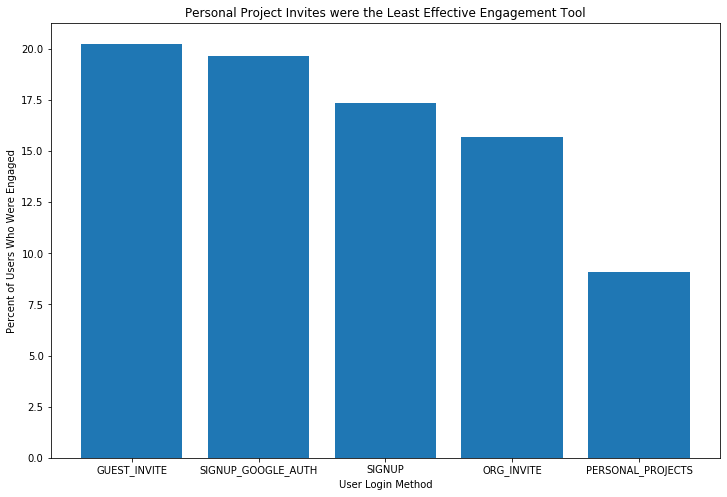

In [20]:
sources = 100 * data.groupby('source').mean()['engaged'].sort_values(ascending=False)
plt.rcParams["figure.figsize"] = (12,8)
plt.bar(sources.index, sources.values)
plt.ylabel('Percent of Users Who Were Engaged')
plt.xlabel('User Login Method')
plt.title('Personal Project Invites were the Least Effective Engagement Tool')
plt.show()

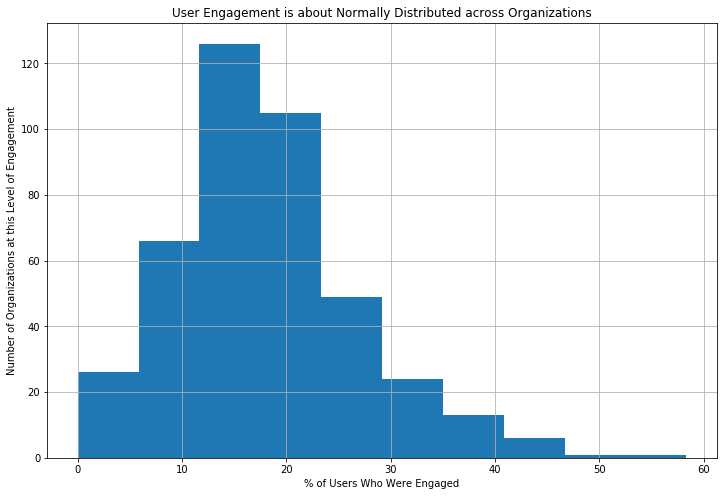

In [21]:
orgs = 100 * data.groupby('org').mean()['engaged'].sort_values(ascending=False)
orgs.hist()
plt.ylabel('Number of Organizations at this Level of Engagement')
plt.xlabel('% of Users Who Were Engaged')
plt.title('User Engagement is about Normally Distributed across Organizations')
plt.show()

In [60]:
org_counts = data.groupby('org').count()['engaged'].sort_values(ascending=False)
large_orgs = org_counts[org_counts > 40]
large_orgs.index

Int64Index([ 0,  1,  2,  3,  4,  6,  5,  9,  7, 10,  8, 14, 11, 12, 17, 18, 13,
            16, 20, 15, 24, 25, 28, 23, 30, 22, 40, 33, 21, 27, 31, 19, 26, 32,
            29, 53, 36, 45, 57, 41, 50, 34, 39, 43, 35, 49, 38, 59, 37, 54, 47,
            46, 66, 58, 88, 52],
           dtype='int64', name='org')

In [61]:
large_orgs_data = data[data['org'].isin(large_orgs.index)]
large_orgs_data.head()

,user,source,mailing,marketing,org,invite,start_date,start_time,start_day,start_month,end_date,end_time,length,streak,engaged,invite_streak
0,1,GUEST_INVITE,1,0,11,10803.0,2014-04-22,03:53:30,Tuesday,4,2014-04-22,03:53:30,0 days,1,False,1.0
1,2,ORG_INVITE,0,0,1,316.0,2013-11-15,03:45:04,Friday,11,2014-03-31,03:45:04,136 days,3,True,1.0
3,4,GUEST_INVITE,0,0,1,5151.0,2013-05-21,08:09:28,Tuesday,5,2013-05-22,08:09:28,1 days,1,False,3.0
6,7,SIGNUP,0,1,37,NaN,2012-12-16,13:24:32,Sunday,12,2012-12-20,13:24:32,4 days,1,False,0.0
13,14,SIGNUP,0,0,0,NaN,2012-10-11,16:14:33,Thursday,10,2012-10-12,16:14:33,1 days,1,False,0.0


In [62]:
train = large_orgs_data.sample(frac=0.6, random_state=42)
test = large_orgs_data.drop(train.index)
train_orgs = 100 * train.groupby('org').mean()['engaged'].sort_values(ascending=False)
train_orgs.head(10)

org
58    40.000000
52    24.137931
24    23.529412
49    21.739130
13    21.153846
30    21.052632
53    20.588235
33    19.354839
35    19.354839
34    18.181818
Name: engaged, dtype: float64

In [63]:
test_orgs = 100 * test.groupby('org').mean()['engaged'].sort_values(ascending=False)
test_orgs.head(10)

org
35    26.666667
40    24.000000
34    23.076923
58    22.727273
49    22.727273
31    21.739130
46    21.428571
24    20.689655
21    20.000000
22    20.000000
Name: engaged, dtype: float64

In [91]:
train_df = pd.DataFrame({"train":train_orgs})
test_df = pd.DataFrame({"test":test_orgs})
hooray = train_df.merge(test_df, how='inner', on='org')
stats.pearsonr(hooray.iloc[:, 0], hooray.iloc[:, 1])

(0.1885117888163502, 0.16410830833833842)

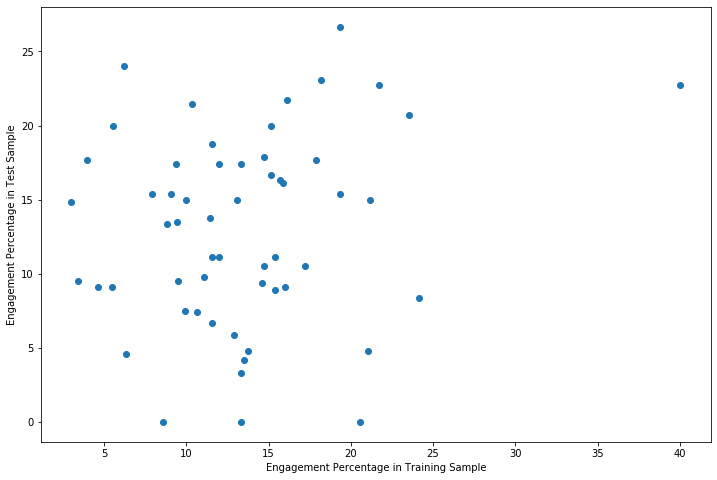

In [93]:
plt.scatter(hooray.iloc[:, 0], hooray.iloc[:, 1])
plt.xlabel('Engagement Percentage in Training Sample')
plt.ylabel('Engagement Percentage in Test Sample')
plt.show()

In [65]:
stats.pearsonr(x, y)

TypeError: object of type 'method' has no len()

In [22]:
stats.pearsonr(data['streak'], data['invite_streak'])

(-0.012593225019447093, 0.16776231664009075)

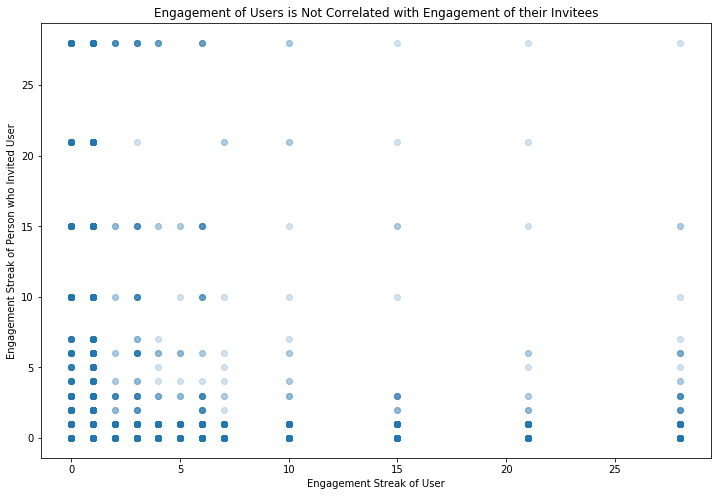

In [23]:
plt.scatter(data['streak'], data['invite_streak'], alpha = 0.2)
plt.xlabel('Engagement Streak of User')
plt.ylabel('Engagement Streak of Person who Invited User')
plt.title('Engagement of Users is Not Correlated with Engagement of their Invitees')
plt.show()

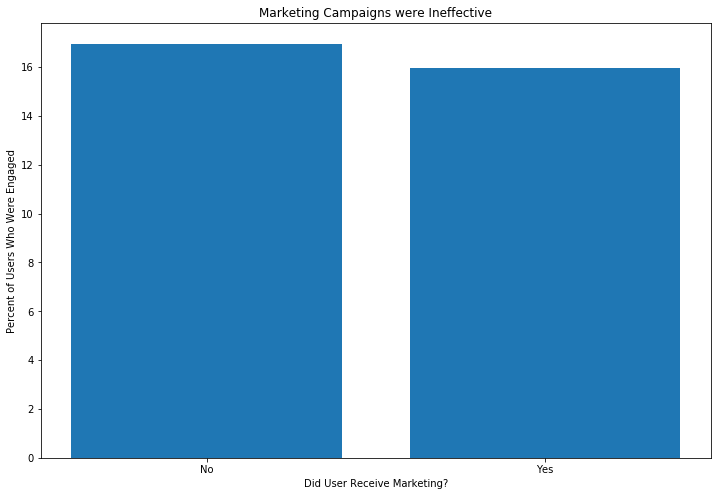

In [24]:
marketing = 100 * data.groupby('marketing').mean()['engaged'].sort_values(ascending=False)
plt.bar(['No', 'Yes'], marketing.values)
plt.ylabel('Percent of Users Who Were Engaged')
plt.xlabel('Did User Receive Marketing?')
plt.title('Marketing Campaigns were Ineffective')
plt.show()

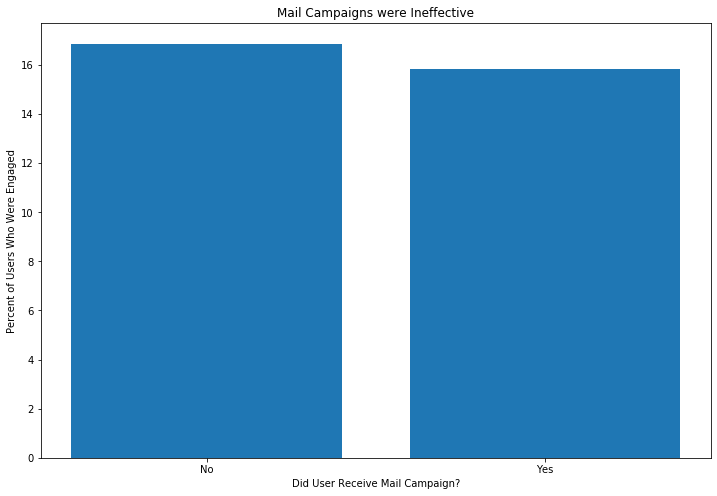

In [25]:
mailing = 100 * data.groupby('mailing').mean()['engaged'].sort_values(ascending=False)
plt.bar(['No', 'Yes'], mailing.values)
plt.ylabel('Percent of Users Who Were Engaged')
plt.xlabel('Did User Receive Mail Campaign?')
plt.title('Mail Campaigns were Ineffective')
plt.show()

In [26]:
mailing, marketing

(mailing
 1    16.867067
 0    15.844992
 Name: engaged, dtype: float64, marketing
 1    16.964286
 0    15.948276
 Name: engaged, dtype: float64)

C:\Users\Jason GL\Anaconda3JGL\envs\biosphere\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


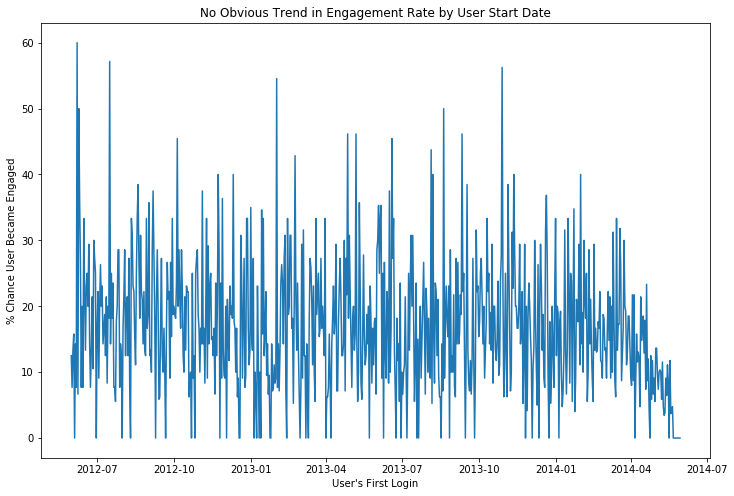

In [27]:
start_dates = 100 * data.groupby('start_date').mean()['engaged'].sort_values(ascending=False)
start_dates = start_dates.sort_index()
plt.plot(start_dates.index, start_dates.values)
plt.xlabel('User\'s First Login')
plt.ylabel('% Chance User Became Engaged')
plt.title('No Obvious Trend in Engagement Rate by User Start Date')
plt.show()

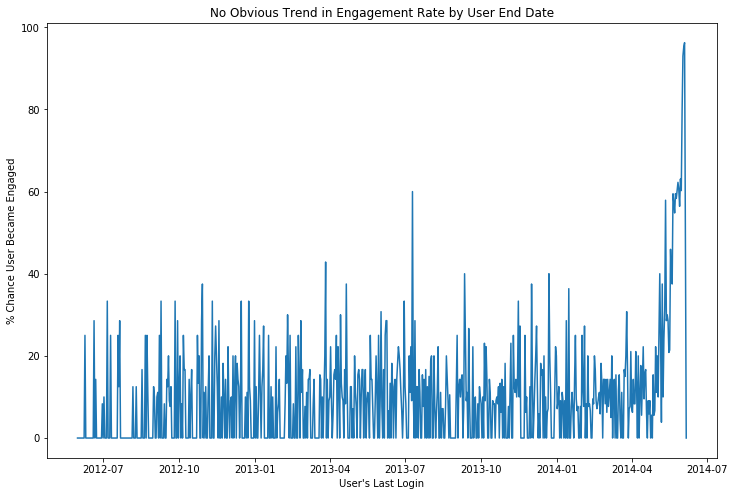

In [28]:
end_dates = 100 * data.groupby('end_date').mean()['engaged'].sort_values(ascending=False)
end_dates = end_dates.sort_index()
plt.plot(end_dates.index, end_dates.values)
plt.xlabel('User\'s Last Login')
plt.ylabel('% Chance User Became Engaged')
plt.title('No Obvious Trend in Engagement Rate by User End Date')
plt.show()

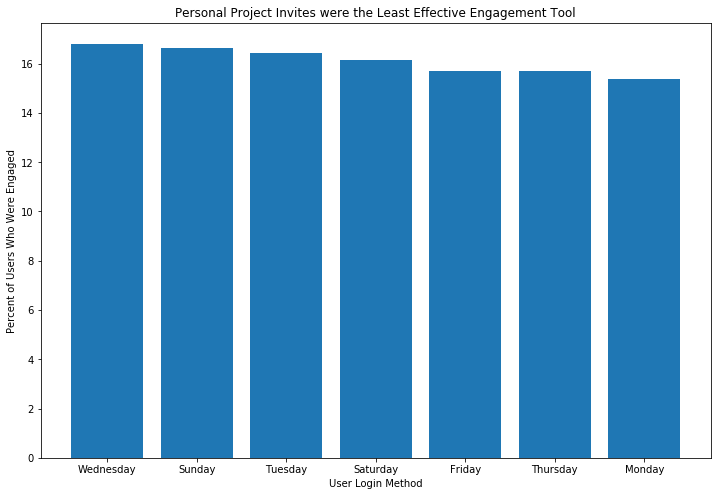

In [29]:
day = 100 * data.groupby('start_day').mean()['engaged'].sort_values(ascending=False)
plt.rcParams["figure.figsize"] = (12,8)
plt.bar(day.index, day.values)
plt.ylabel('Percent of Users Who Were Engaged')
plt.xlabel('Day of Week When User Joined')
plt.title('Day of Week Not Significantly Connected to Engagement')
plt.show()

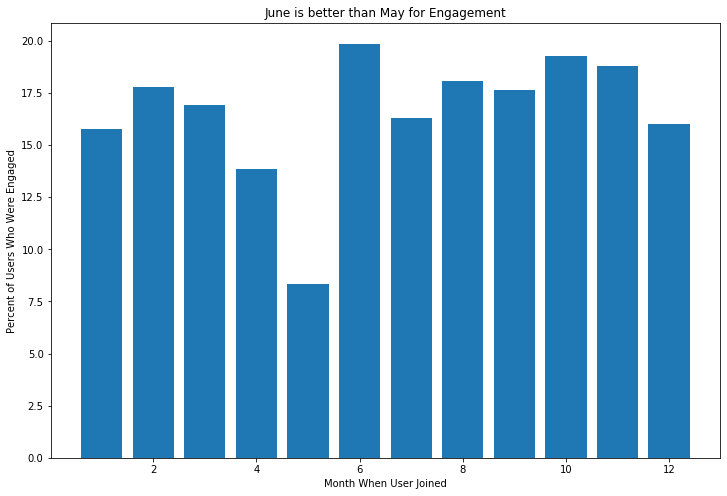

In [32]:
plt.rcParams["figure.figsize"] = (12,8)
plt.bar(month.index, month.values)
plt.ylabel('Percent of Users Who Were Engaged')
plt.xlabel('Month When User Joined')
plt.title('June is better than May for Engagement')
plt.show()

In [35]:
month = 100 * data.groupby('start_month').mean()['engaged'].sort_values(ascending=False)
month

pandas.core.series.Series

In [37]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = month
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.65
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=0
[19.85731272 19.26406926 18.8034188  18.07511737 17.77301927 17.64705882
 16.90739167 16.31455399 16.02150538 15.74344023 13.85799829  8.3161512 ]
probability=0.650, critical=nan, stat=0.000
Independent (fail to reject H0)
significance=0.350, p=1.000
Independent (fail to reject H0)


In [94]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = sources
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.65
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=0
[20.24965326 19.63898917 17.34547197 15.70286789  9.09521554]
probability=0.650, critical=nan, stat=0.000
Independent (fail to reject H0)
significance=0.350, p=1.000
Independent (fail to reject H0)
